In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('world-happiness-report.csv')
df21 = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
# add feature on regional indicator from the 2021 file to df
df = pd.merge(df,df21[['Country name','Regional indicator']], on = 'Country name')

In [4]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [11]:
#get a list of unique country names
Country_names = set(df['Country name'])
#get the list of countres who have data for both 2019 and 2020
cm = [name for name in Country_names if (2020 in df[df['Country name'] == name].year.tolist()) and (2019 in df[df['Country name'] == name].year.tolist())]
len(cm)

93

In [ ]:
#filter data to get countries which have data for both 2019 and 2020
data = df[df['Country name'].isin(cm) & df.year.isin([2019,2020]) ]
data.info()

In [94]:
data2019 = data[data.year==2019].groupby('Regional indicator')[['Life Ladder', 'Negative affect', 'Positive affect']].mean()
data2020 = data[data.year==2020].groupby('Regional indicator')[['Life Ladder', 'Negative affect', 'Positive affect']].mean()

In [30]:
df[df['Regional indicator']=='North America and ANZ'].groupby('Country name')[['Life Ladder', 'Negative affect', 'Positive affect']].mean()

,Life Ladder,Negative affect,Positive affect
Country name,,,
Australia,7.282071,0.213357,0.800643
Canada,7.376333,0.250933,0.849600
New Zealand,7.310286,0.199857,0.845857
United States,7.090200,0.261667,0.827600


In [18]:
set(df['Regional indicator'])

{'Central and Eastern Europe',
 'Commonwealth of Independent States',
 'East Asia',
 'Latin America and Caribbean',
 'Middle East and North Africa',
 'North America and ANZ',
 'South Asia',
 'Southeast Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

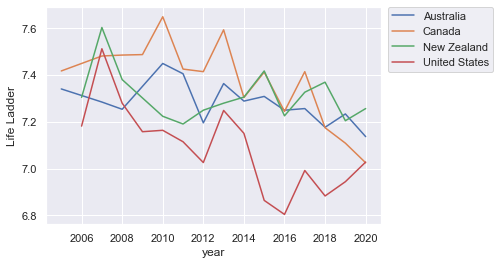

In [28]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='Life Ladder', hue='Country name', data=df[df['Regional indicator']=='North America and ANZ'])

#put the legend in the right place
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

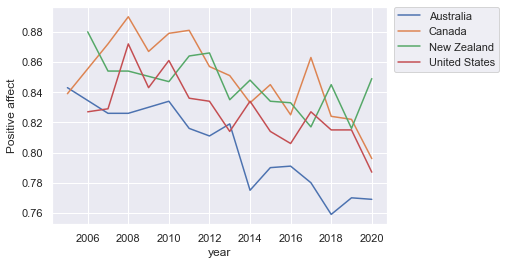

In [22]:
sns.lineplot(x='year', y='Positive affect', hue='Country name', data=df[df['Regional indicator']=='North America and ANZ'])
#put the legend in the right place
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

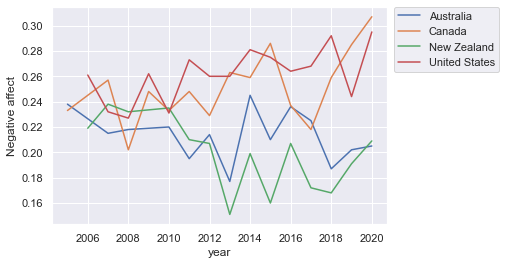

In [25]:
sns.lineplot(x='year', y='Negative affect', hue='Country name', data=df[df['Regional indicator']=='North America and ANZ'])
#put the legend in the right place
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

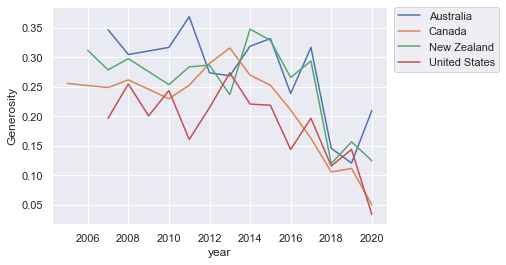

In [26]:
sns.lineplot(x='year', y='Generosity', hue='Country name', data=df[df['Regional indicator']=='North America and ANZ'])
#put the legend in the right place
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)